In [1]:
import pandas as pd
from tqdm import tqdm
from annotate_level import annotate_level
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("realec_sample_final.tsv", sep='\t', index_col='Unnamed: 0').drop(['NUM','-1'], axis=1)

In [3]:
df.to_csv("realec_sample_final.csv")

In [4]:
df

,id,Sentence (original),Sentence (changed),Right answer,Error type,Error type+,Level,path_in_REALEC
1,36478,The graph given to us represents the informati...,The graph represents information about changes...,the world's investment,Articles,Articles,2.0,https://realec.org/index.xhtml#/exam/Exam2016/...
2,67749,"Moreover, they need money to feed their child...",NaN,this money,Agreement_errors,Countable_uncountable,1.0,https://realec.org/index.xhtml#/exam/Exam2017/...
4,4238,Globalization creates an important basis for ...,Globalization creates an important basis for ...,ecological ones,Absence_comp_sent,Punctuation,3.0,https://realec.org/index.xhtml#/2012-2014/esl_...
5,13931,"Nowadays, the problems with <b>student</b> beh...",NaN,student`s,Possessive,Possessive,NaN,https://realec.org/index.xhtml#/exam/Exam2014/...
6,50904,If in North Africa and South Asia there <b>is...,If in North Africa and South Asia there <b>is...,were,Agreement_errors //Tense_choice,Agreement_errors,3.0,https://realec.org/index.xhtml#/exam/Exam2017/...
...,...,...,...,...,...,...,...,...
800,9805,T2 Some people assume that one crucial way of ...,NaN,the number of sports facilities,Absence_comp_sent,Absence_comp_sent,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...
806,5896,"To my mind,<b>others</b>urse it is better whe...",NaN,others,Possessive,Possessive,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...
811,10081,"Also , people can <b>communicated</b> with ot...",NaN,communicate,Tense_form,Tense_form,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...
823,15186,"In my opinion, it is important to try to reac...",NaN,mean,lex_item_choice,lex_item_choice,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...


In [5]:
def is_non_empty_str(x):
    if type(x) == str:
        if len(x) > 0:
            return True
    return False

In [6]:
df["Sentence"] = df.apply(lambda x: x["Sentence (changed)"] if is_non_empty_str(x["Sentence (changed)"]) else x["Sentence (original)"],
                         axis=1)

In [7]:
df

,id,Sentence (original),Sentence (changed),Right answer,Error type,Error type+,Level,path_in_REALEC,Sentence
1,36478,The graph given to us represents the informati...,The graph represents information about changes...,the world's investment,Articles,Articles,2.0,https://realec.org/index.xhtml#/exam/Exam2016/...,The graph represents information about changes...
2,67749,"Moreover, they need money to feed their child...",NaN,this money,Agreement_errors,Countable_uncountable,1.0,https://realec.org/index.xhtml#/exam/Exam2017/...,"Moreover, they need money to feed their child..."
4,4238,Globalization creates an important basis for ...,Globalization creates an important basis for ...,ecological ones,Absence_comp_sent,Punctuation,3.0,https://realec.org/index.xhtml#/2012-2014/esl_...,Globalization creates an important basis for ...
5,13931,"Nowadays, the problems with <b>student</b> beh...",NaN,student`s,Possessive,Possessive,NaN,https://realec.org/index.xhtml#/exam/Exam2014/...,"Nowadays, the problems with <b>student</b> beh..."
6,50904,If in North Africa and South Asia there <b>is...,If in North Africa and South Asia there <b>is...,were,Agreement_errors //Tense_choice,Agreement_errors,3.0,https://realec.org/index.xhtml#/exam/Exam2017/...,If in North Africa and South Asia there <b>is...
...,...,...,...,...,...,...,...,...,...
800,9805,T2 Some people assume that one crucial way of ...,NaN,the number of sports facilities,Absence_comp_sent,Absence_comp_sent,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...,T2 Some people assume that one crucial way of ...
806,5896,"To my mind,<b>others</b>urse it is better whe...",NaN,others,Possessive,Possessive,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...,"To my mind,<b>others</b>urse it is better whe..."
811,10081,"Also , people can <b>communicated</b> with ot...",NaN,communicate,Tense_form,Tense_form,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...,"Also , people can <b>communicated</b> with ot..."
823,15186,"In my opinion, it is important to try to reac...",NaN,mean,lex_item_choice,lex_item_choice,NaN,https://realec.org/index.xhtml#/old_IELTS/IELT...,"In my opinion, it is important to try to reac..."


In [18]:
df.to_csv("realec_sample_final1.csv")

Тут я немного отредактировал данные в ОpenOfficeCalc - посмотрел, где в Sentence отсутствовали тэги открытия и закрытия, отредактировал опечатки в этих строках

In [8]:
df = pd.read_csv("realec_sample_final1.csv")

In [9]:
[col for col in df.columns]

['Unnamed: 0',
 'id',
 'Sentence (original)',
 'Sentence (changed)',
 'Right answer',
 'Error type',
 'Error type+',
 'Level (Hand)',
 'path_in_REALEC',
 'Sentence',
 'Error span']

In [10]:
df = df.rename({'Level': 'Level (Hand)'}, axis=1)

In [11]:
[col for col in df.columns]

['Unnamed: 0',
 'id',
 'Sentence (original)',
 'Sentence (changed)',
 'Right answer',
 'Error type',
 'Error type+',
 'Level (Hand)',
 'path_in_REALEC',
 'Sentence',
 'Error span']

In [12]:
tqdm.pandas()

c:\users\k1l77\desktop\182e~1\term_p~1\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [13]:
df['Error span'] = df['Sentence'].progress_apply(lambda x:\
                                                re.search('<b>(.*?)</b>',
                                                         x).group(1))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 836/836 [00:00<?, ?it/s]


In [14]:
df = df.dropna(subset=['Sentence', 'Error span',
                      'Right answer', 'Error type', 'Level (Hand)'],
              axis=0)
df = df.loc[(df['Level (Hand)']==1.0)|(df['Level (Hand)']==2.0)|(df['Level (Hand)']==3.0)]
df['Level (Hand)'] = df['Level (Hand)'].apply(int)

In [15]:
df

,Unnamed: 0,id,Sentence (original),Sentence (changed),Right answer,Error type,Error type+,Level (Hand),path_in_REALEC,Sentence,Error span
0,1,36478,The graph given to us represents the informati...,The graph represents information about changes...,the world's investment,Articles,Articles,2,https://realec.org/index.xhtml#/exam/Exam2016/...,The graph represents information about changes...,world's investment
1,2,67749,"Moreover, they need money to feed their child...",NaN,this money,Agreement_errors,Countable_uncountable,1,https://realec.org/index.xhtml#/exam/Exam2017/...,"Moreover, they need money to feed their child...",these money
2,4,4238,Globalization creates an important basis for ...,Globalization creates an important basis for ...,ecological ones,Absence_comp_sent,Punctuation,3,https://realec.org/index.xhtml#/2012-2014/esl_...,Globalization creates an important basis for ...,ecological
4,6,50904,If in North Africa and South Asia there <b>is...,If in North Africa and South Asia there <b>is...,were,Agreement_errors //Tense_choice,Agreement_errors,3,https://realec.org/index.xhtml#/exam/Exam2017/...,If in North Africa and South Asia there <b>is...,is
5,7,61808,That is <b>really hard task</b> for people to ...,That is <b>really hard task</b> for people to ...,a really hard task,Articles,Articles,2,https://realec.org/index.xhtml#/exam/Exam2017/...,That is <b>really hard task</b> for people to ...,really hard task
...,...,...,...,...,...,...,...,...,...,...,...
738,835,43202,In the Middle East and Latin America the rate...,NaN,"from 6,8 to 5,8",Absence_comp_sent,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,In the Middle East and Latin America the rate...,"6,8 to 5,8"
740,837,68578,A more detailed look reveals that there are s...,A more detailed look reveals that there are s...,to,Prepositions,suggestion,3,https://realec.org/index.xhtml#/exam/Exam2017/...,A more detailed look reveals that there are s...,from
741,838,80835,"Firstly, I believe that space could <b>wait</...","Firstly, I believe that space could wait <b>a...",until,Linking_device OR Conjunctions,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,"Firstly, I believe that space could wait <b>a...","a time, when"
742,839,67232,<b>Having paid</b> more attention to it we wi...,NaN,By paying,Structure_confusion,Participial_constr,3,https://realec.org/index.xhtml#/exam/Exam2017/...,<b>Having paid</b> more attention to it we wi...,Having paid


In [16]:
df = df.drop(['Unnamed: 0'], axis=1)

In [17]:
df.to_csv("FullAnnotatedSet.csv")

In [18]:
df_annot = annotate_level(df)

c:\users\k1l77\desktop\182e~1\term_p~1\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 581/581 [00:02<00:00, 272.05it/s]


In [19]:
from sklearn.metrics import classification_report

In [20]:
df_annot

array([2, 1, 3, 0, 2, 1, 2, 2, 2, 2, 1, 2, 3, 0, 3, 0, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 2, 1, 1, 2, 3, 3, 3, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1,
       1, 2, 3, 2, 2, 3, 1, 0, 3, 1, 0, 1, 1, 1, 1, 2, 0, 3, 2, 2, 2, 2,
       1, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 1, 1, 0,
       3, 2, 2, 3, 2, 3, 0, 2, 3, 0, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 0, 1,
       2, 0, 0, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 3, 3, 0, 1, 3,
       3, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 1, 1, 0, 2, 3,
       3, 0, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 0, 0, 3, 2, 0, 0, 2, 0,
       2, 2, 2, 3, 1, 1, 2, 1, 2, 1, 3, 3, 0, 3, 1, 2, 0, 1, 1, 0, 0, 0,
       2, 3, 0, 2, 2, 3, 3, 0, 1, 3, 2, 0, 3, 2, 1, 2, 0, 3, 3, 0, 1, 3,
       3, 3, 0, 2, 2, 3, 3, 2, 2, 2, 3, 2, 1, 0, 0, 0, 3, 2, 0, 2, 2, 0,
       3, 3, 3, 1, 3, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 3, 0, 2, 0, 3,
       1, 3, 1, 2, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 2,

In [23]:
print(classification_report(df['Level (Hand)'], df_annot))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.92      0.92       118
           2       0.78      0.84      0.81       200
           3       0.94      0.48      0.63       263

    accuracy                           0.70       581
   macro avg       0.66      0.56      0.59       581
weighted avg       0.88      0.70      0.75       581



In [22]:
pd.Series(df_annot).value_counts()

2    216
3    134
1    118
0    113
dtype: int64

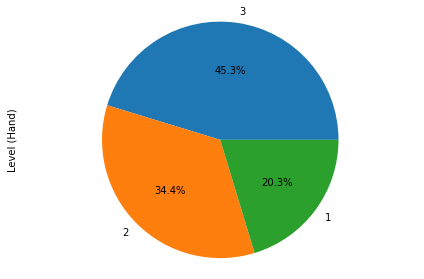

In [30]:
pd.Series(df["Level (Hand)"]).value_counts().plot.pie(autopct='%1.1f%%')
plt.axis("equal")
plt.tight_layout()
plt.show()

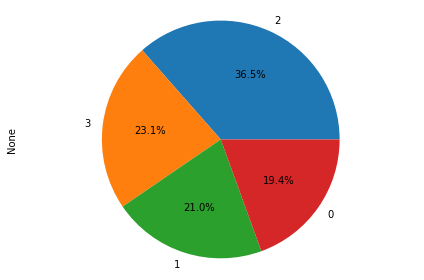

In [29]:
pd.Series(df_annot).value_counts().plot.pie(autopct='%1.1f%%')
plt.axis("equal")
plt.tight_layout()
plt.show()

In [25]:
report = pd.DataFrame(classification_report(df['Level (Hand)'], df_annot,
                                           output_dict=True)).transpose().applymap(lambda x: np.round(x, 2))
report.to_csv("RuleReport.csv")

In [34]:
df['Level (Hand)'].unique()

array([2, 1, 3], dtype=int64)

In [35]:
df['LevelAuto'] = df_annot

In [36]:
df.to_csv("QuestionLevels.tsv", sep='\t')

В общем, accuracy на правилах у нас - 0.67 (было 0.66)

Сохраним те предложения, у которых уровень определился как 0, отдельно:

In [37]:
df

,Unnamed: 0,id,Sentence (original),Sentence (changed),Right answer,Error type,Error type+,Level (Hand),path_in_REALEC,Sentence,Error span,LevelAuto
0,1,36478,The graph given to us represents the informati...,The graph represents information about changes...,the world's investment,Articles,Articles,2,https://realec.org/index.xhtml#/exam/Exam2016/...,The graph represents information about changes...,world's investment,2
1,2,67749,"Moreover, they need money to feed their child...",NaN,this money,Agreement_errors,Countable_uncountable,1,https://realec.org/index.xhtml#/exam/Exam2017/...,"Moreover, they need money to feed their child...",these money,1
2,4,4238,Globalization creates an important basis for ...,Globalization creates an important basis for ...,ecological ones,Absence_comp_sent,Punctuation,3,https://realec.org/index.xhtml#/2012-2014/esl_...,Globalization creates an important basis for ...,ecological,3
4,6,50904,If in North Africa and South Asia there <b>is...,If in North Africa and South Asia there <b>is...,were,Agreement_errors //Tense_choice,Agreement_errors,3,https://realec.org/index.xhtml#/exam/Exam2017/...,If in North Africa and South Asia there <b>is...,is,0
5,7,61808,That is <b>really hard task</b> for people to ...,That is <b>really hard task</b> for people to ...,a really hard task,Articles,Articles,2,https://realec.org/index.xhtml#/exam/Exam2017/...,That is <b>really hard task</b> for people to ...,really hard task,2
...,...,...,...,...,...,...,...,...,...,...,...,...
738,835,43202,In the Middle East and Latin America the rate...,NaN,"from 6,8 to 5,8",Absence_comp_sent,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,In the Middle East and Latin America the rate...,"6,8 to 5,8",3
740,837,68578,A more detailed look reveals that there are s...,A more detailed look reveals that there are s...,to,Prepositions,suggestion,3,https://realec.org/index.xhtml#/exam/Exam2017/...,A more detailed look reveals that there are s...,from,3
741,838,80835,"Firstly, I believe that space could <b>wait</...","Firstly, I believe that space could wait <b>a...",until,Linking_device OR Conjunctions,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,"Firstly, I believe that space could wait <b>a...","a time, when",0
742,839,67232,<b>Having paid</b> more attention to it we wi...,NaN,By paying,Structure_confusion,Participial_constr,3,https://realec.org/index.xhtml#/exam/Exam2017/...,<b>Having paid</b> more attention to it we wi...,Having paid,0


In [38]:
df.columns

Index(['Unnamed: 0', 'id', 'Sentence (original)', 'Sentence (changed)',
       'Right answer', 'Error type', 'Error type+', 'Level (Hand)',
       'path_in_REALEC', 'Sentence', 'Error span', 'LevelAuto'],
      dtype='object')

In [39]:
df_zero = df[df['LevelAuto'] == 0]

In [40]:
df_zero

,Unnamed: 0,id,Sentence (original),Sentence (changed),Right answer,Error type,Error type+,Level (Hand),path_in_REALEC,Sentence,Error span,LevelAuto
4,6,50904,If in North Africa and South Asia there <b>is...,If in North Africa and South Asia there <b>is...,were,Agreement_errors //Tense_choice,Agreement_errors,3,https://realec.org/index.xhtml#/exam/Exam2017/...,If in North Africa and South Asia there <b>is...,is,0
16,19,39505,"Overall, the chart gives information that aro...","Overall, the chart gives information that aro...",a bigger proportion,Comparison_degree,Comparison_degree,3,https://realec.org/index.xhtml#/exam/Exam2016/...,"Overall, the chart gives information that aro...",the biggest proportion,0
18,21,17497,The situation in Africa <b>is decreased</b> a...,The situation in Africa <b>was decreased</b> ...,worsened,Voice //lex_item_choice,Voice,3,https://realec.org/index.xhtml#/exam/Exam2016/...,The situation in Africa <b>was decreased</b> ...,was decreased,0
20,23,69626,"But on the other hand, there are a lot of <b>...",NaN,people who,Relative_clause,Relative_clause,3,https://realec.org/index.xhtml#/exam/Exam2017/...,"But on the other hand, there are a lot of <b>...","people, who",0
25,29,56370,<b>Exploration the space</b> can lead to the ...,<b>Exploration the space</b> can lead to new ...,Space exploration,Word_order //Article,Word_order,3,https://realec.org/index.xhtml#/exam/Exam2017/...,<b>Exploration the space</b> can lead to new ...,Exploration the space,0
...,...,...,...,...,...,...,...,...,...,...,...,...
718,813,55758,The most significant difference took place fo...,The most significant difference was registere...,three times as often as,Comparative_constr,Tense_choice,3,https://realec.org/index.xhtml#/exam/Exam2017/...,The most significant difference was registere...,three times more often than,0
730,826,4617,<b>USA's growth of elderly people percentage<...,NaN,The growth in the percentage of elderly people...,Structure_confusion,Word_order,3,https://realec.org/index.xhtml#/exam/Exam2014/...,<b>USA's growth of elderly people percentage<...,USA's growth of elderly people percentage,0
737,834,79712,The given pie charts present the major reasons...,The given pie charts present the major reasons...,a ten-year period,Structure_confusion //Article,Possessive,3,https://realec.org/index.xhtml#/exam/Exam2019/...,The given pie charts present the major reasons...,the ten year's period,0
741,838,80835,"Firstly, I believe that space could <b>wait</...","Firstly, I believe that space could wait <b>a...",until,Linking_device OR Conjunctions,Prepositions,3,https://realec.org/index.xhtml#/exam/Exam2017/...,"Firstly, I believe that space could wait <b>a...","a time, when",0


In [41]:
df_zero["Level (Hand)"].value_counts()

3    90
2    22
1     1
Name: Level (Hand), dtype: int64

In [44]:
df_zero.to_csv("ZeroLevel.csv")

Объём выборки:

In [43]:
len(df_zero)/len(df)

0.1944922547332186

Попробуем использовать предобученный классификатор на подвыборке, на которой правила ничего не нашли - в случае успеха получим прирост accuracy до 20%

In [46]:
len(df[df['Level (Hand)'] == df['LevelAuto']])

388

In [47]:
388/581

0.6678141135972461

In [50]:
388+59

447

In [51]:
447/581

0.7693631669535284

С добавлением машинного обучения в случаях, где ни одно правило не срабатывает, "добиваем" accuracy до 75% (см. https://colab.research.google.com/drive/1VraUJI_1Ko-Butsbpkfy_f_IZVgpwmj0?usp=sharing)